In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount="True")

In [2]:
# cd drive/MyDrive/Colab\ Notebooks/week_2

In [3]:
pwd

'C:\\Users\\YUNUSYILDIRIM\\Desktop\\data-science-bootcamp\\week_2'

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
import missingno as msno
import sweetviz as sv
from ydata_profiling import ProfileReport

In [5]:
df = pd.read_csv("aug_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
# aug_train_report = sv.analyze(df)
# aug_train_report.show_html('aug_train.html')

In [7]:
# profile = ProfileReport(df, title="aug_train Profiling Report")
# profile.to_file("aug_train_pandas_profilig_report.html")

In [17]:
print(df.isna().sum())
print()
print(df.isna().sum()/len(df))

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


In [8]:
# def hot_deck_imputation(df, feature_column='major_discipline', k=5):
#     imputed_df = df.copy()

#     missing_rows = imputed_df[imputed_df[feature_column].isnull()]

#     non_missing_rows = imputed_df[imputed_df[feature_column].notnull()]

#     features = non_missing_rows.drop(columns=[feature_column])

#     feature_values = non_missing_rows[feature_column]

#     nn_model = NearestNeighbors(n_neighbors=k)
#     nn_model.fit(features)


#     for _, row in missing_rows.iterrows():
#         missing_features = row.drop(labels=[feature_column])

#         distances, indices = nn_model.kneighbors([missing_features])

#         selected_neighbor_index = np.random.choice(indices[0])

#         imputed_value = feature_values.iloc[selected_neighbor_index]

#         imputed_df.loc[row.name, feature_column] = imputed_value

#     return imputed_df

def fill_experience(row, ):
    if(row.relevent_experience == 0 and (row.experience == '<1' or row.experience == None)):
        return '0'
    elif(row.relevent_experience != 0 and row.experience == '<1'):
        return '0.5'
    elif(row.relevent_experience != 0 and row.experience == None):
        return row.relevent_experience
    elif(row.experience == '>20'):
        return '21'
    return row.experience

def get_city_status(row):
    if row['city_development_index'] > 0.8:
        return 'Developed'
    return 'Developing'

    
def fill_major_discipline(row):
    if(row.education_level in ['High School', 'Primary School']):
        return 'No Major'
    return row.major_discipline

def fill_last_new_job(row):
    if(row.last_new_job != None):
        if(row.last_new_job == 'never'):
            return '0'
        elif(row.last_new_job == '>4'):
            return '5'
    return row.last_new_job    

In [ ]:
# df = pd.read_csv("aug_train.csv")
# print([df.company_type.unique()])
# print(df.company_size.unique())
# print
# df.head()

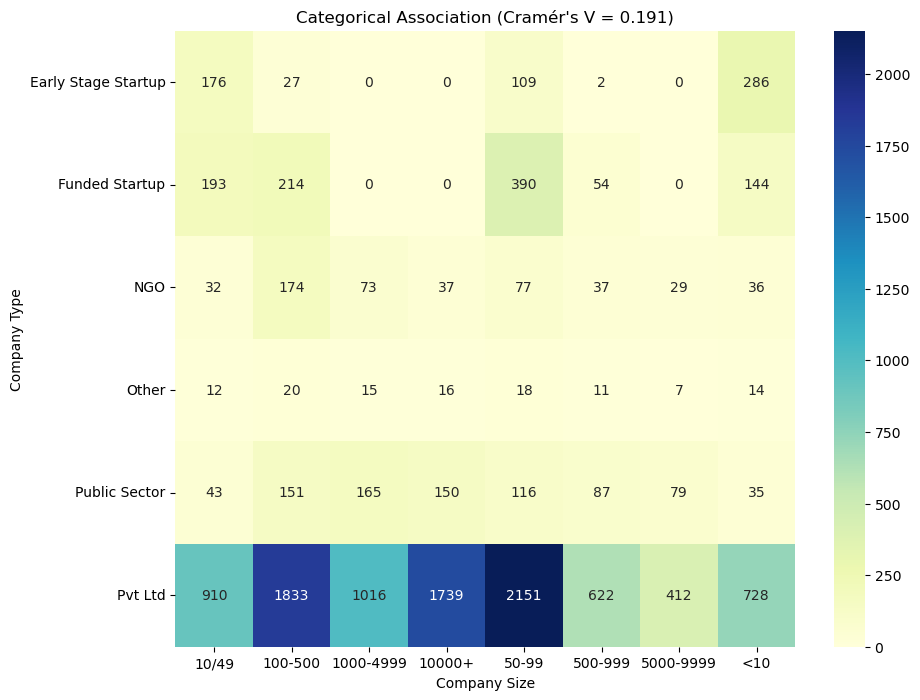

In [10]:
contingency_table = pd.crosstab(df['company_type'], df['company_size'])

def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_v_stat = cramers_v(contingency_table.values)

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Categorical Association (Cramér\'s V = {cramers_v_stat:.3f})')
plt.xlabel('Company Size')
plt.ylabel('Company Type')
plt.show()

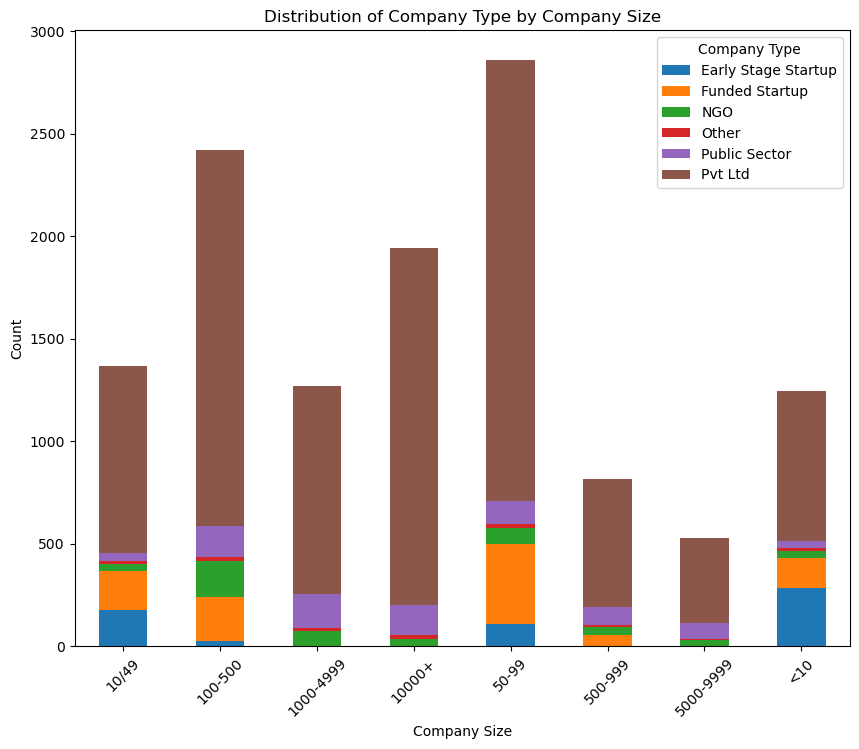

In [19]:
grouped_data = df.groupby('company_size')['company_type'].value_counts().unstack().fillna(0)

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Distribution of Company Type by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Company Type')
plt.show()

<Axes: xlabel='company_size', ylabel='count'>

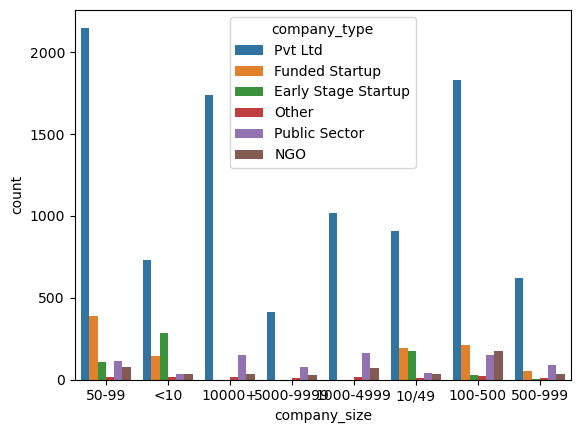

In [12]:
sns.countplot(x='company_size', hue='company_type', data=df)

In [33]:
df = pd.read_csv("aug_train.csv")

df["city_status"] = df.apply(get_city_status, axis=1)

df.relevent_experience = df.replace({'relevent_experience': {'Has relevent experience': '1', 'No relevent experience': '0'}}).relevent_experience.astype(int)

df.gender.fillna('Not provided',inplace=True)

def fill_missing_values(df):
    # missing values < 5% - nominal
    mode = df['enrolled_university'].mode()[0]
    df['enrolled_university'].fillna(mode, inplace=True)

    ordinal_mapping = {'no_enrollment': 0, 'Primary School': 1, 'High School': 2, 'Graduate': 3, 'Masters': 4, 'Phd': 5}
    df['education_level'] = df['education_level'].map(ordinal_mapping)
    mean = df['education_level'].mean()
    print("education_level mean:" + str(mean))
    df['education_level'].fillna(mean, inplace=True)
    # reverse_mapping = {v: k for k, v in ordinal_mapping.items()}
    # df['education_level'] = df['education_level'].map(reverse_mapping)

    df.major_discipline = df.apply(fill_major_discipline, axis=1)
    mode = df['major_discipline'].mode()[0]
    print("major_discipline mode:" + str(mode))
    df['major_discipline'].fillna(mode, inplace=True)

    df.experience = df.apply(fill_experience, axis=1).astype(float)
    mean = df['experience'].mean()
    print("experience mean:" + str(mean))
    df['experience'].fillna(mean, inplace=True)

    df.last_new_job = df.apply(fill_last_new_job, axis=1).astype(float)
    mean = df['last_new_job'].mean()
    print("last_new_job mean:" + str(mean))
    df['last_new_job'].fillna(mean, inplace=True)

    df['training_hours'].fillna(df["training_hours"].median(), inplace=True)
    print("training_hours median:" + str(df["training_hours"].median()))
    
    ordinal_mapping = {
    '<10': '1',
    '10/49': '2',
    '50-99': '3',
    '100-500': '4',
    '500-999': '5',
    '1000-4999': '6',
    '5000-9999': '7',
    '10000+': '8'
    }

    df["company_size"] = df["company_size"].replace(ordinal_mapping)
    df.loc[df.last_new_job == 0, "company_size"] = '0'
    mode = df['company_size'].mode()[0]
    print("company_size mode:" + str(mode))
    df['company_size'].fillna(mode, inplace=True)
    df.company_size = df.company_size.astype(int)
    
    df.loc[df.last_new_job == 0, "company_type"] = 'No Company'
    mode = df['company_type'].mode()[0]
    df['company_type'].fillna(mode, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  int32  
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
 14  city_status             19158 non-null

In [34]:
df_copy = df.copy()

X = df_copy.drop('target', axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=df[["target", "city_status"]])

fill_missing_values(X_train)
fill_missing_values(X_test)

education_level mean:3.138713543747503
major_discipline mode:STEM
experience mean:10.084121648033774
last_new_job mean:1.9915625248746318
training_hours median:47.0
company_size mode:3
education_level mean:3.1326217046741065
major_discipline mode:STEM
experience mean:10.145668041891463
last_new_job mean:2.0184705119896305
training_hours median:48.0
company_size mode:3


In [35]:
print(X_train.info())
print()
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12835 entries, 2832 to 17407
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12835 non-null  int64  
 1   city                    12835 non-null  object 
 2   city_development_index  12835 non-null  float64
 3   gender                  12835 non-null  object 
 4   relevent_experience     12835 non-null  int32  
 5   enrolled_university     12835 non-null  object 
 6   education_level         12835 non-null  float64
 7   major_discipline        12835 non-null  object 
 8   experience              12835 non-null  float64
 9   company_size            12835 non-null  int32  
 10  company_type            12835 non-null  object 
 11  last_new_job            12835 non-null  float64
 12  training_hours          12835 non-null  int64  
 13  city_status             12835 non-null  object 
dtypes: float64(4), int32(2), int64(2), 

array([[<Axes: title={'center': 'enrollee_id'}>,
        <Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'relevent_experience'}>],
       [<Axes: title={'center': 'education_level'}>,
        <Axes: title={'center': 'experience'}>,
        <Axes: title={'center': 'company_size'}>],
       [<Axes: title={'center': 'last_new_job'}>,
        <Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

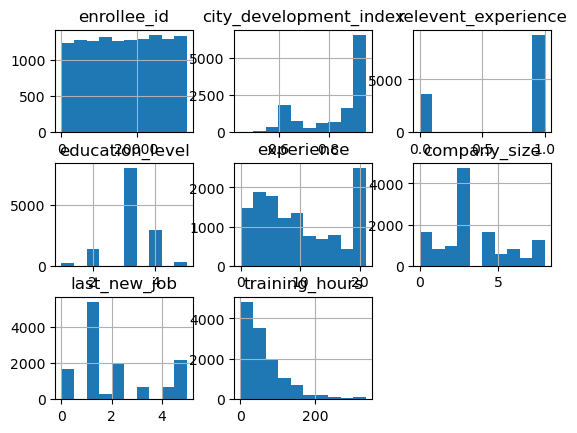

In [37]:
X_train.hist()

array([[<Axes: title={'center': 'enrollee_id'}>,
        <Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'relevent_experience'}>],
       [<Axes: title={'center': 'education_level'}>,
        <Axes: title={'center': 'experience'}>,
        <Axes: title={'center': 'company_size'}>],
       [<Axes: title={'center': 'last_new_job'}>,
        <Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

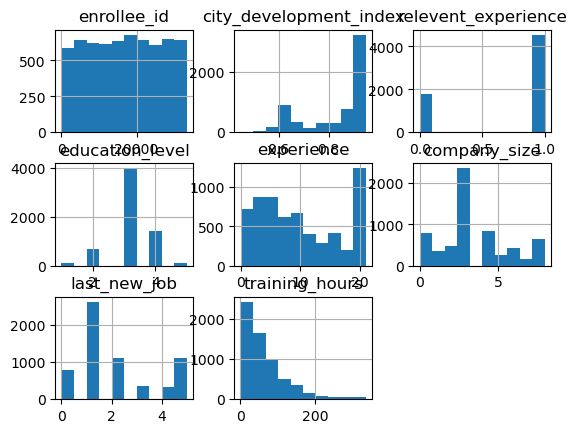

In [38]:
X_test.hist()